In [5]:
from sklearn.datasets import fetch_openml
import numpy as np

# 1. Fetch MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# 2. Split into images and labels
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)  

# 3. Train/Test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# 4. Traning the Model 
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

[False]


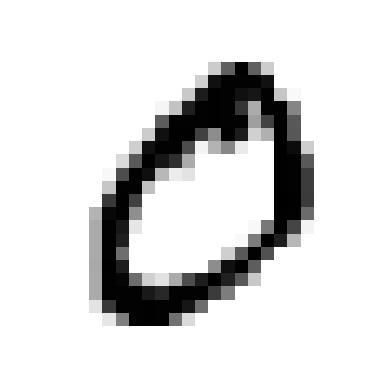

In [6]:
# 5. Testing
some_digit = X[1]
print(sgd_clf.predict([some_digit]))

import matplotlib.pyplot as plt
some_digit_image = some_digit.reshape(28, 28)  # Turn it back into 28x28 image
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show() 

In [7]:
# 6. Performance Measures
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(scores)


[0.95035 0.96035 0.9604 ]


In [8]:
# 7. confusion Matrix
from sklearn.model_selection import cross_val_predict

# Instead of just a score, we want predictions
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5, y_train_pred))



[[53892   687]
 [ 1891  3530]]


In [9]:
# 8. Precision and Recall
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train_5, y_train_pred))
print("Recall:", recall_score(y_train_5, y_train_pred))

Precision: 0.8370879772350012
Recall: 0.6511713705958311


In [10]:
# 9. Check F1
from sklearn.metrics import f1_score

print("F1 Score:", f1_score(y_train_5, y_train_pred))


F1 Score: 0.7325171197343847


In [11]:
# 10. Decision Threshold 
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
from sklearn.metrics import precision_score, recall_score

threshold = 0  # the default value
y_pred_threshold = (y_scores > threshold)
print(y_pred_threshold)
print("Precision:", precision_score(y_train_5, y_pred_threshold))
print("Recall:", recall_score(y_train_5, y_pred_threshold))



[ True False False ...  True False False]
Precision: 0.8370879772350012
Recall: 0.6511713705958311


In [12]:
# 11. Multi-Class classifications
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)  
sgd_clf.predict([X[0]])  


array([3], dtype=uint8)

In [13]:
# 12. Scale the X data for better accuracy
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print(scores) 

[0.8983 0.891  0.9018]


[0.87365 0.85835 0.8689 ]
[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


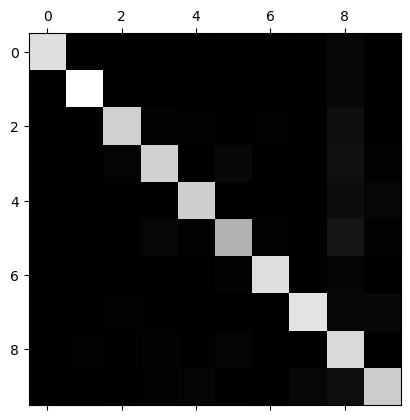

In [14]:
# 13. Confusion Matrix for multi class
scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print(scores)

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [15]:
# 14. Precision / Recall / F1 Score for Multi-Class
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, y_train_pred, average="weighted")
recall = recall_score(y_train, y_train_pred, average="weighted")
f1 = f1_score(y_train, y_train_pred, average="weighted")

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9075131315075091
Recall: 0.8970333333333333
F1 Score: 0.8995917470760803


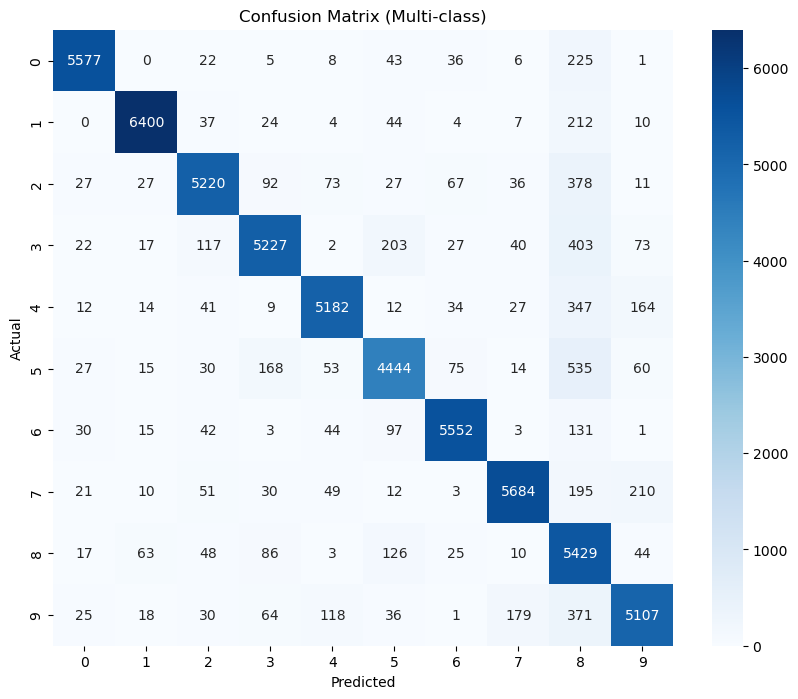

In [16]:
# 15. Visualize the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mx, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Multi-class)")
plt.show()
 

In [17]:
# 16. Training a better model(RandomForestClassifier)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

# Accuracy
scores = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
print("Random Forest Accuracy:", scores.mean())


Random Forest Accuracy: 0.9645833333333335


In [18]:
# Testing the new model
forest_clf.predict([X[0]])
forest_clf.predict_proba([X[0]])


array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [19]:
# 16. Compare Random Forest vs SGD Classifier 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# SGD predictions
sgd_preds = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
sgd_acc = accuracy_score(y_train, sgd_preds)

# Forest predictions
forest_preds = cross_val_predict(forest_clf, X_train, y_train, cv=3)
forest_acc = accuracy_score(y_train, forest_preds)

print("SGD Accuracy:", sgd_acc)
print("Random Forest Accuracy:", forest_acc)


SGD Accuracy: 0.8970333333333333
Random Forest Accuracy: 0.9645833333333333


In [20]:
# 17. Multilabel Classification

y_multilabel = np.c_[(y_train >= 7), (y_train % 2 == 1)]

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

print("Actual Digit:", y_train[0])  # just for reference


Actual Digit: 5


In [21]:
# Testing Multi label

knn_clf.predict([X_train[0]])

array([[False,  True]])

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
print("F1 Score (macro):", f1_score(y_multilabel, y_train_knn_pred, average="macro"))


F1 Score (macro): 0.9764102655606048


In [23]:
# 17. Multi output Classification
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_noisy = X_train + noise
X_train_noisy = np.clip(X_train_noisy, 0., 255.)

noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_noisy = X_test + noise_test
X_test_noisy = np.clip(X_test_noisy, 0., 255.)


In [24]:
# 18. Testing Multi output Classification
from sklearn.neighbors import KNeighborsRegressor

knn_denoise = KNeighborsRegressor()
knn_denoise.fit(X_train_noisy, X_train)


KNeighborsRegressor()

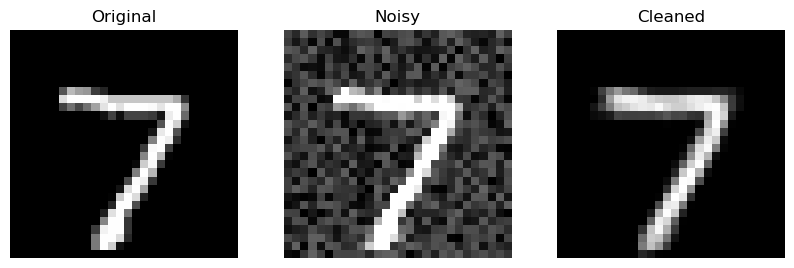

In [25]:
# Choose one test image
index = 0
noisy_image = X_test_noisy[index]
cleaned_image = knn_denoise.predict([noisy_image])

# Plot original vs noisy vs cleaned
import matplotlib.pyplot as plt

def show_images(original, noisy, cleaned):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    for ax, img, title in zip(axes, [original, noisy, cleaned], ["Original", "Noisy", "Cleaned"]):
        ax.imshow(img.reshape(28, 28), cmap="gray")
        ax.set_title(title)
        ax.axis("off")
    plt.show()

show_images(X_test[index], noisy_image, cleaned_image[0])


In [26]:
# 20. Building the model with KNeighborsClassifier exercise 1
from sklearn.neighbors import KNeighborsClassifier
# knn_denoise = KNeighborsClassifier(random_state=42)
knn_denoise.fit(X_train, y_train)

scores = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
print(scores)

[0.9646  0.96255 0.9666 ]


In [27]:
knn_denoise.predict([X[65]])
# knn_denoise.predict_proba([X[0]])

array([5.])

In [28]:
# 21. FIrnding best parameters for KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_neighbors": [3, 4, 5],
    "weights": ["uniform", "distance"]
}
X_small = X_train[:10000]
y_small = y_train[:10000]

grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search.fit(X_small, y_small)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [29]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'n_neighbors': 4, 'weights': 'distance'}
Best CV Score: 0.9397994088551026


In [30]:
# 22. Building the best model
from sklearn.neighbors import KNeighborsClassifier

best_knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
best_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [31]:
# 22. Testing on test set
test_accuracy = best_knn.score(X_test, y_test)
print("Final Test Accuracy:", test_accuracy)


Final Test Accuracy: 0.9714


In [32]:
#23. 2nd exercise rotating image

def shift_image(image, direction):
    image = image.reshape(28, 28)  # reshape from 784 to 28x28
    shifted = np.zeros_like(image)  # create a blank canvas

    if direction == "up":
        shifted[:-1, :] = image[1:, :]
    elif direction == "down":
        shifted[1:, :] = image[:-1, :]
    elif direction == "left":
        shifted[:, :-1] = image[:, 1:]
    elif direction == "right":
        shifted[:, 1:] = image[:, :-1]

    return shifted.reshape(784)  # flatten back to 784

X_train_aug = []
y_train_aug = []

for img, label in zip(X_train, y_train):
    X_train_aug.append(img)        # original
    y_train_aug.append(label)

    for dir in ["up", "down", "left", "right"]:
        shifted_img = shift_image(img, dir)
        X_train_aug.append(shifted_img)
        y_train_aug.append(label)

import numpy as np

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=4, weights="distance")
knn_clf.fit(X_train_aug, y_train_aug)


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [34]:
acc = knn_clf.score(X_test, y_test)
print("Test Accuracy with Augmented Data:", acc)


Test Accuracy with Augmented Data: 0.9763
